In [ ]:
# Install necessary libraries
!pip install -q diffusers transformers accelerate torch



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.9 MB/s eta 0:00:00


In [ ]:
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image
import torch


pipe = AutoPipelineForInpainting.from_pretrained("diffusers/stable-diffusion-xl-1.0-inpainting-0.1", torch_dtype=torch.float16, variant="fp16").to("cuda")





model_index.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/659 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


Original Image:


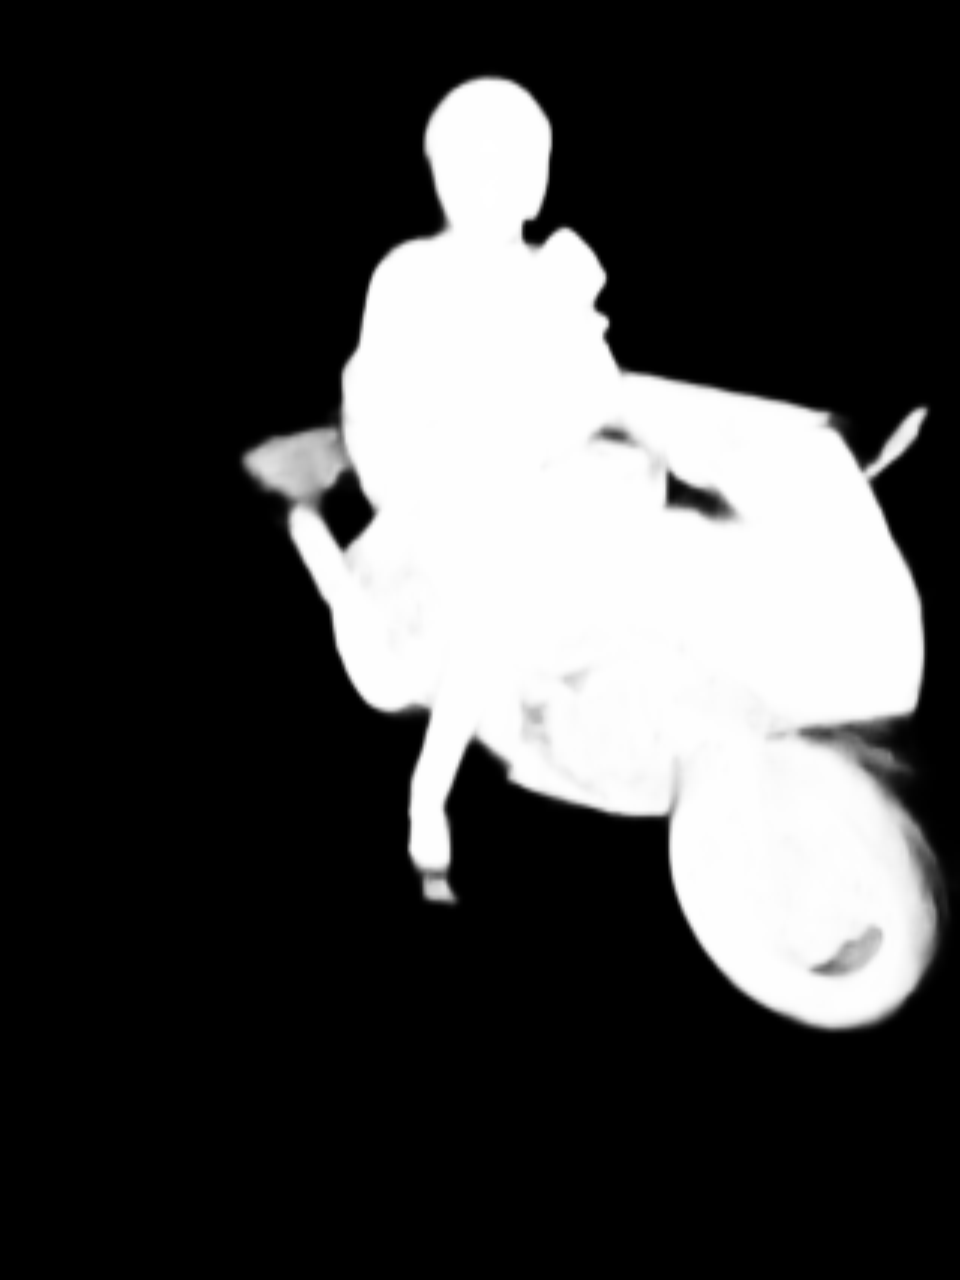


Inverted Image:


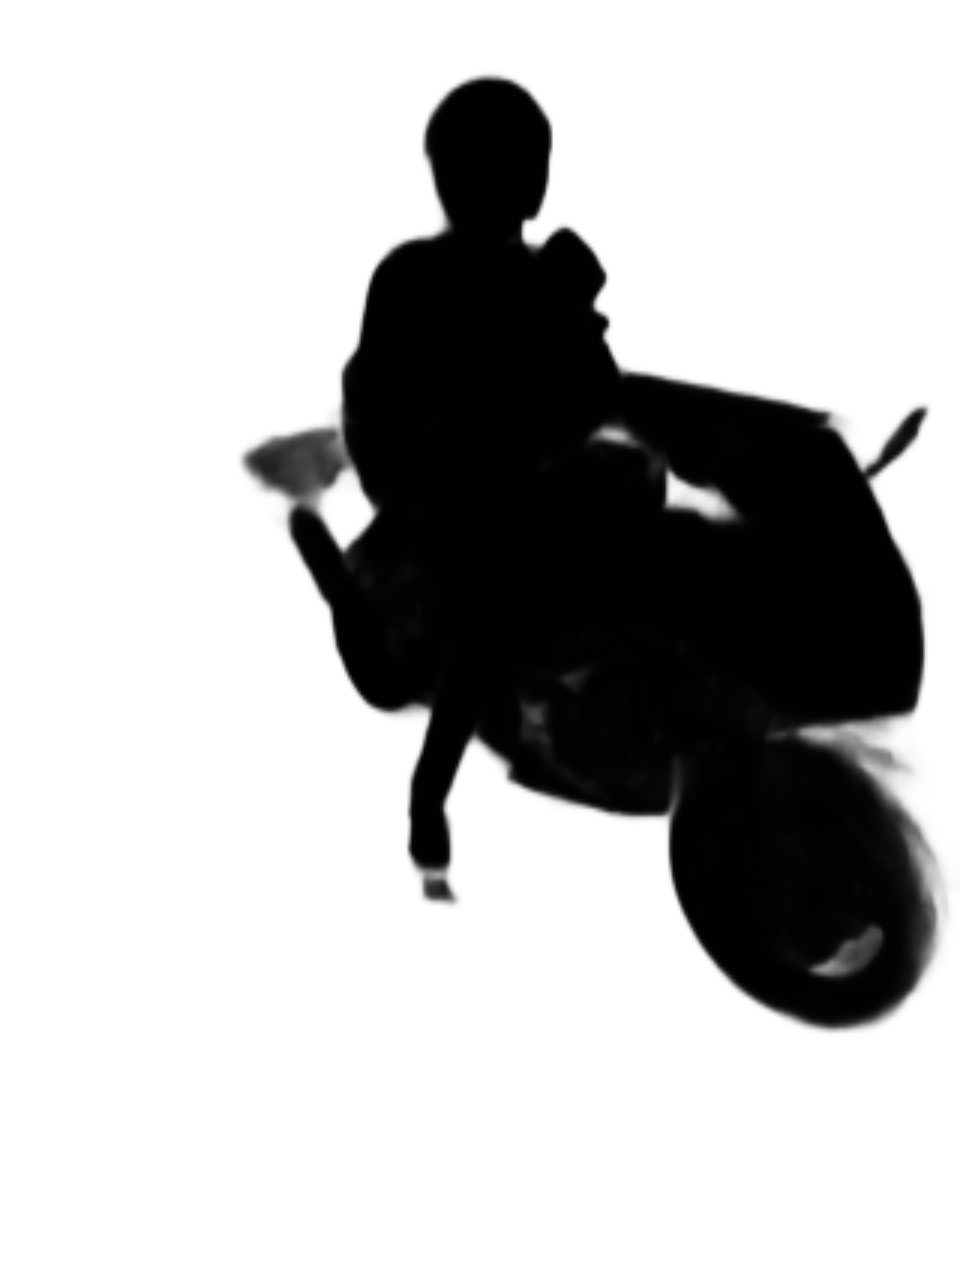


Inverted image saved as: aminee_inverted.png


'aminee_inverted.png'

In [ ]:
from PIL import Image, ImageOps
from IPython.display import display

def invert_image(image_path):
    """
    Inverts a black and white image in Colab

    Args:
        image_path (str): Path to the image file in your Colab workspace
    """
    try:
        # Open the image
        original_img = Image.open(image_path)

        # Convert to grayscale if not already
        if original_img.mode != 'L':
            original_img = original_img.convert('L')

        # Invert the image
        inverted_img = ImageOps.invert(original_img)

        # Create output filename
        if '.' in image_path:
            parts = image_path.rsplit('.', 1)
            output_path = f"{parts[0]}_inverted.{parts[1]}"
        else:
            output_path = f"{image_path}_inverted"

        # Save the inverted image
        inverted_img.save(output_path)

        # Display results
        print("Original Image:")
        display(original_img)

        print("\nInverted Image:")
        display(inverted_img)

        print(f"\nInverted image saved as: {output_path}")
        return output_path

    except Exception as e:
        print(f"Error: {e}")
        return None


invert_image("aminee.png")


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['light interaction : warm spotlight highlights ), shallow depth of field ( f / 1. 4 ), vogue jewelry spread, luxury watch ad style']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['light interaction : warm spotlight highlights ), shallow depth of field ( f / 1. 4 ), vogue jewelry spread, luxury watch ad style']


  0%|          | 0/49 [00:00<?, ?it/s]

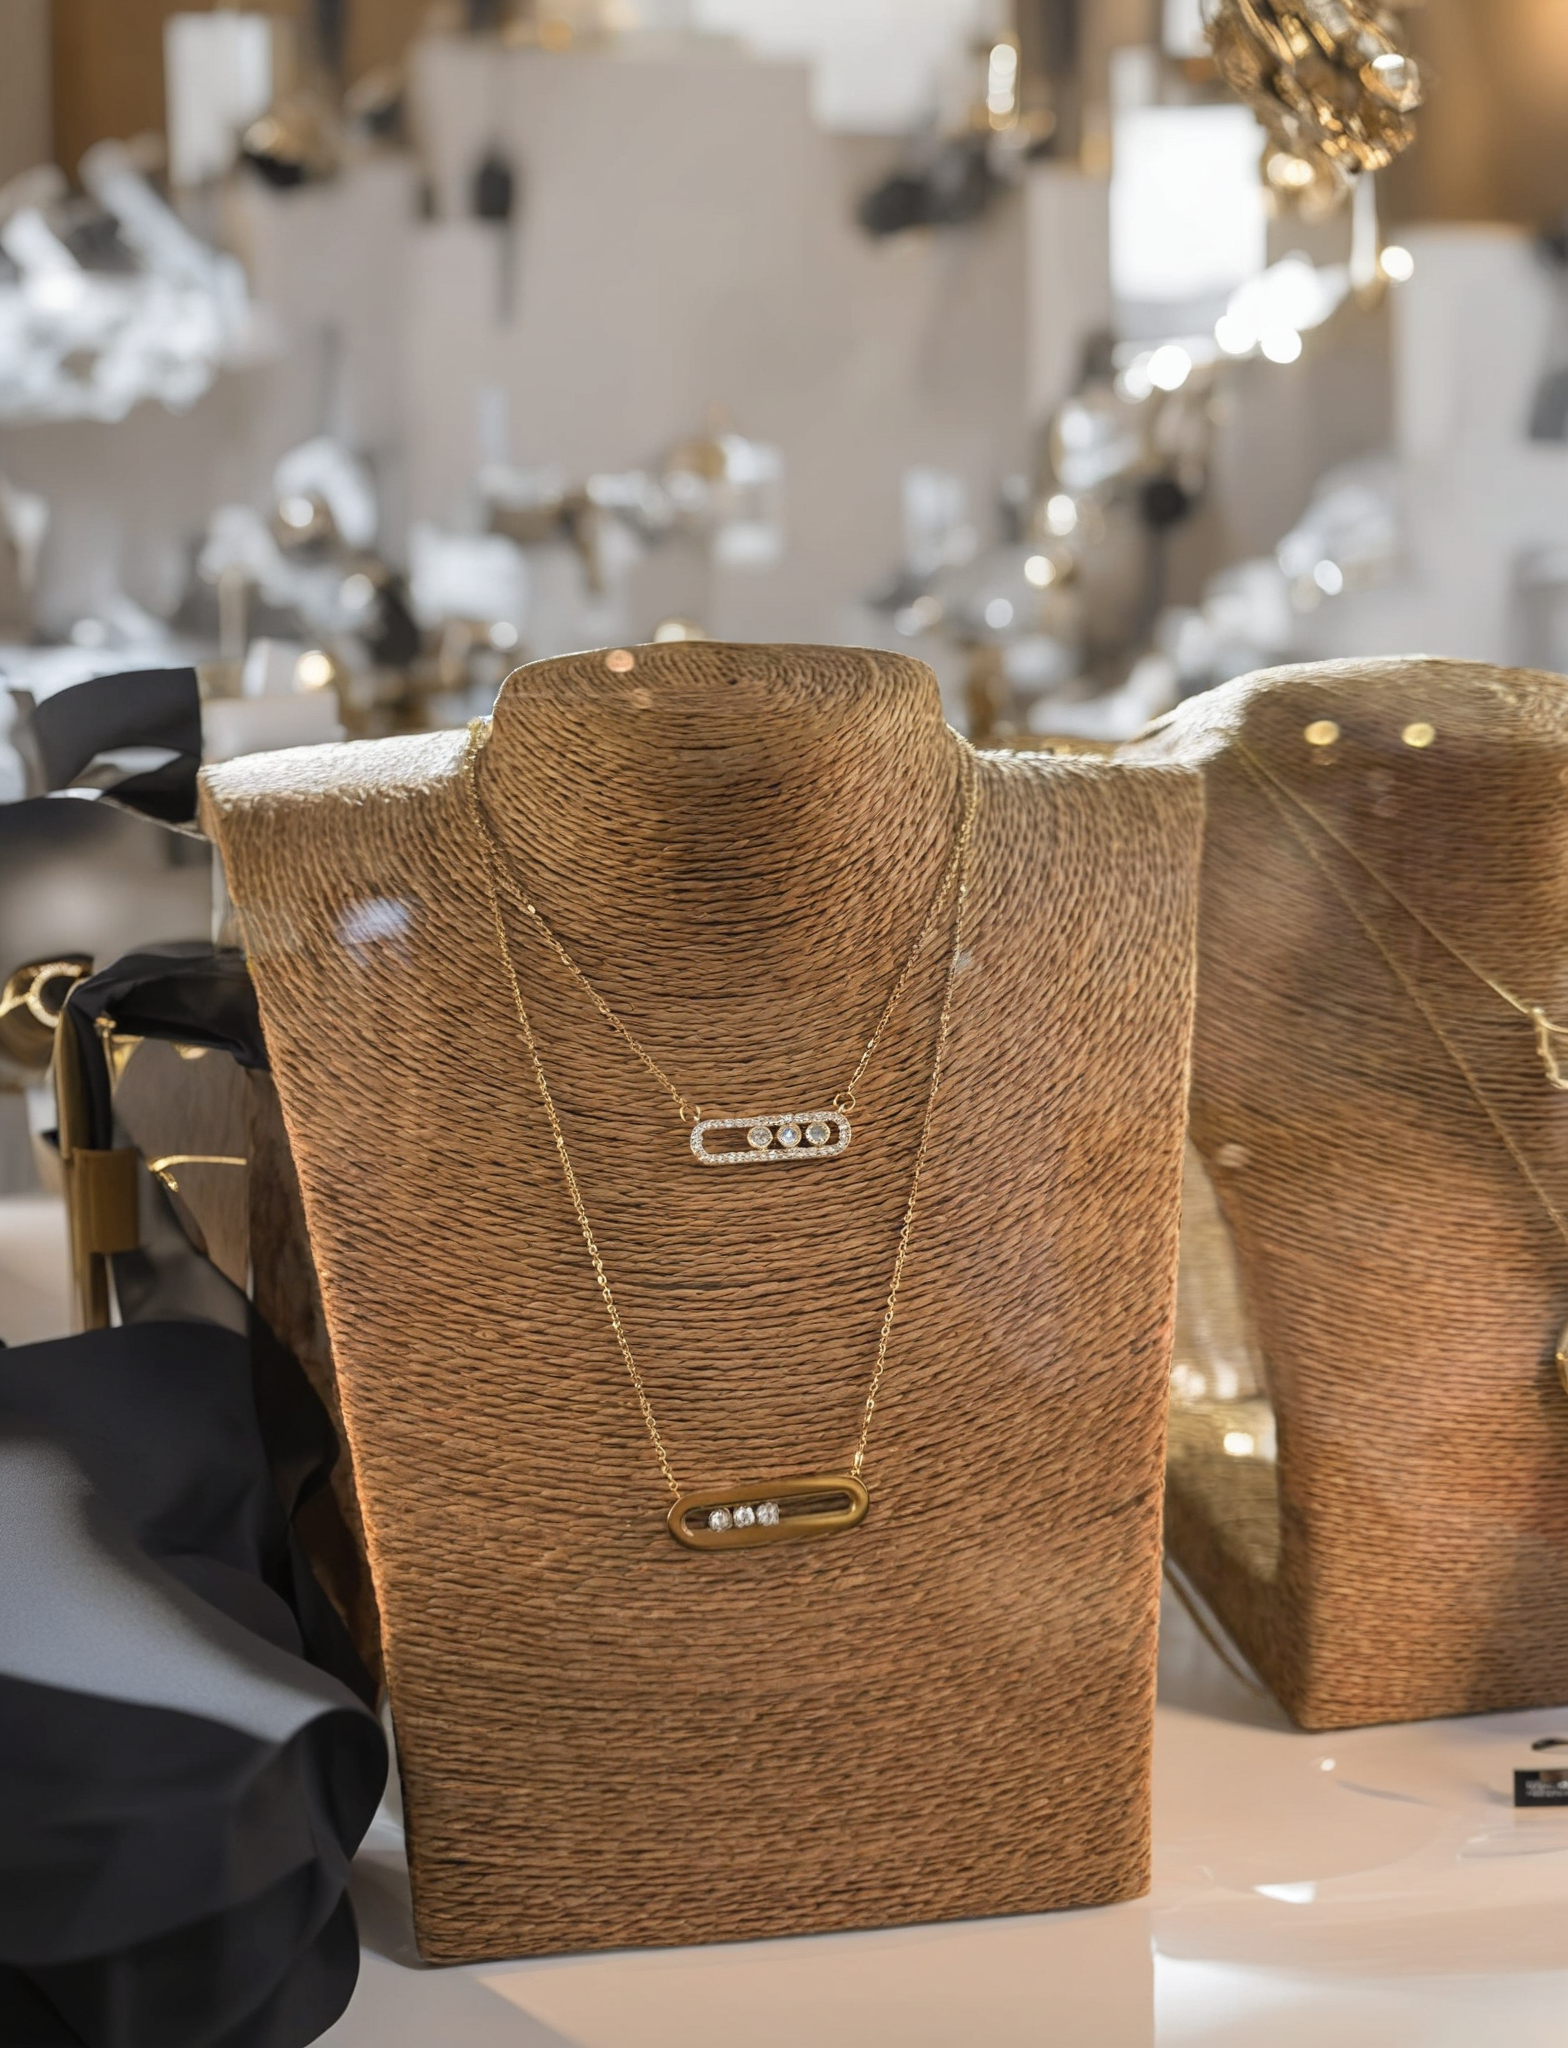

In [ ]:
# Load a sample image and mask (replace with your own URLs or upload files)
from PIL import Image

init_image = Image.open("aminee.jpg").convert("RGB")
#init_image = init_image.resize((1024, 1024), Image.LANCZOS)
mask_image = Image.open("aminee_inverted.png").convert("RGB")
#mask_image = mask_image.resize((1024, 1024), Image.LANCZOS)
# Define the prompt for inpainting
prompt = """
background of beatiful mountains and nature blend perfectly with the rider on his bike
"""

negative_prompt = """
additional_object, extra_item, duplicate, floating_objects,
new_product, unintended_element, cloned_object,
blurry, lowres, bad_anatomy, text, watermark,
cropped, jpeg_artifacts, deformed_hands,
mutated_product, extra_limbs, disfigured,
poor_lighting, uneven_shadows, overexposed,
underexposed, grainy, out_of_frame,
3d_render, cgi, plastic, cartoon, painting,changing the product
"""
# Use more steps (e.g., 50) since this isn’t Turbo; adjust for quality vs. speed
output = pipe(
    prompt=prompt,
    image=init_image,
    mask_image=mask_image,
    num_inference_steps=50,  # Higher steps for better quality
    guidance_scale=7.5,     # Standard CFG for SDXL
    strength=0.99,          # Nearly full regeneration of masked area
    negative_prompt=negative_prompt,
    height=1280,
    width=960
).images[0]

# Save and display the result
output.save("inpainted_result_amine.png")
output